In [1]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sys
import itertools
import os
from scipy.stats import normaltest
from itertools import groupby
import datetime
import scipy.stats as stats
from scipy.stats import linregress


In [2]:
def read_df(df_to_read):

    with open(df_to_read, 'rb') as f:
        df = pickle.load(f)

    return df

In [4]:
storage_path = r"/storage/users/assafzar/Muscle_Differentiation_AvinoamLab/"
intensity_model_path = storage_path + r"15-12-2022-actin_intensity local dens-False, s%s, s%s train [130, 160] diff window win size 16/track len 30, impute_func-ImputeAllData_impute_zeroes reg MeanOpticalFlowReg_/" % (1,5)
motility_model_path = storage_path + r"15-12-2022-motility local dens-False, s%s, s%s train [130, 160] diff window/track len 30, impute_func-ImputeAllData_impute_zeroes reg MeanOpticalFlowReg_/" % (1,5)

s2_path_actin_intensity= intensity_model_path + 'df_score_vid_num_S2.pkl'
s2_path_motility=motility_model_path + 'df_score_vid_num_S2.pkl'

s3_path_actin_intensity=intensity_model_path + 'df_score_vid_num_S3.pkl'
s3_path_motility= motility_model_path + 'df_score_vid_num_S3.pkl'

s6_path_actin_intensity= intensity_model_path + 'df_score_vid_num_S6.pkl'
s6_path_motility=motility_model_path + 'df_score_vid_num_S6.pkl'

s8_path_actin_intensity=intensity_model_path + 'df_score_vid_num_S8.pkl'
s8_path_motility= motility_model_path + 'df_score_vid_num_S8.pkl'

dictoni_score = {'s6_path_actin_intensity': s6_path_actin_intensity,
               's8_path_actin_intensity': s8_path_actin_intensity,
                's2_path_actin_intensity': s2_path_actin_intensity,
                's3_path_actin_intensity': s3_path_actin_intensity,
                's6_path_motility': s6_path_motility, 
                's8_path_motility': s8_path_motility,
                's2_path_motility': s2_path_motility,
                's3_path_motility': s3_path_motility,
               }


## create new columns of change score and change persistence ##

In [5]:
def preprocess_df(df):
    change_df = pd.DataFrame()
    num_cells = 0
    for idx,grp in df.groupby('Spot track ID'):
        num_cells += 1
        score_df = grp
        first_intensity_score = grp['score_intensity'].dropna().iloc[0]
        first_motility_score = grp['score_motility'].dropna().iloc[0]
        score_df['change_persistence'] = grp['persistence'].diff(periods=10)
        score_df['change_score_intensity'] = grp['score_intensity'].diff(periods=10)
        score_df['change_score_motility'] = grp['score_motility'].diff(periods=10)

       # Append the modified group data to change_df
        change_df = pd.concat([change_df, score_df], ignore_index=True)
    print(num_cells)
    # pd.concat(change_df)
    return change_df

In [6]:
scores_df_s3 = read_df('properties_scores_df_S3.pkl')
new_df = preprocess_df(scores_df_s3)
new_df.head()

675


,score_motility,time,Spot frame,Spot track ID,score_intensity,Spot position X,Spot position Y,speed,mean,persistence,local density,change_persistence,change_score_intensity,change_score_motility
0,NaN,1.916667,23,1,NaN,835.057373,1162.679565,NaN,226.003906,NaN,18,NaN,NaN,NaN
1,NaN,2.000000,24,1,NaN,838.671875,1158.896362,5.232327,224.750000,NaN,20,NaN,NaN,NaN
2,NaN,2.083333,25,1,NaN,843.192322,1160.707520,4.869777,316.326172,NaN,22,NaN,NaN,NaN
3,NaN,2.166667,26,1,NaN,845.664429,1161.416504,2.571764,390.664062,NaN,24,NaN,NaN,NaN
4,NaN,2.250000,27,1,NaN,845.338318,1166.744629,5.338096,392.964844,NaN,22,NaN,NaN,NaN


### plot of example cell ###

In [23]:
df_score_persistence = new_df[new_df['Spot track ID'] == 27879][['score_motility','score_intensity','persistence', 'time']]
df_score_persistence['score_SMA_motility']= df_score_persistence['score_motility'].rolling(5).mean()
df_score_persistence['score_SMA_intensity']= df_score_persistence['score_intensity'].rolling(5).mean()
df_score_persistence['persistence_SMA']=df_score_persistence['persistence'].rolling(5).mean()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


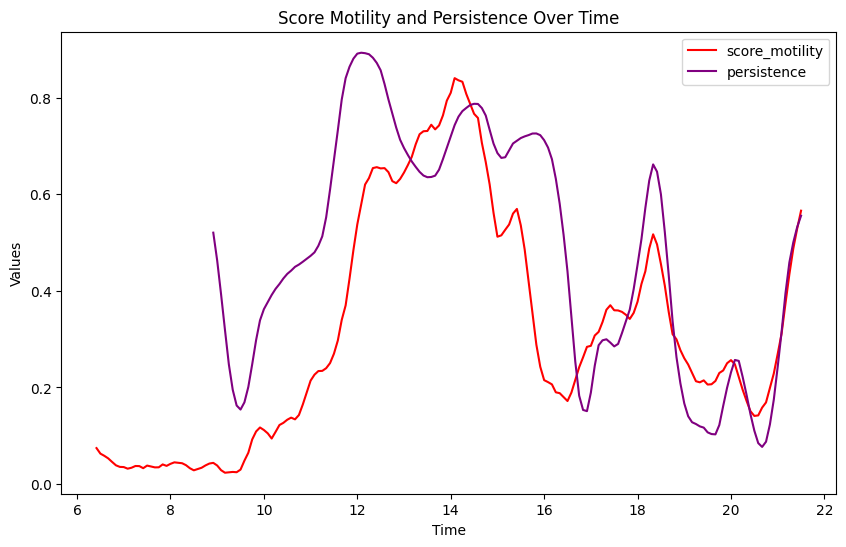

In [27]:
# Extract the data for plotting
score_motility = df_score_persistence['score_SMA_motility']
persistence = df_score_persistence['persistence_SMA']
time = df_score_persistence['time']

# Create a plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Plot 'score_motility' in red and 'persistence' in purple, with time on the x-axis
plt.plot(time, score_motility, label='score_motility', color='red')
plt.plot(time, persistence, label='persistence', color='purple')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Values')  # You can update the y-axis label accordingly
plt.legend()

# Show the plot
plt.title('Score Motility and Persistence Over Time')
plt.savefig('Example cell Score Motility and Persistence Over Time.eps', format='eps')

plt.show()

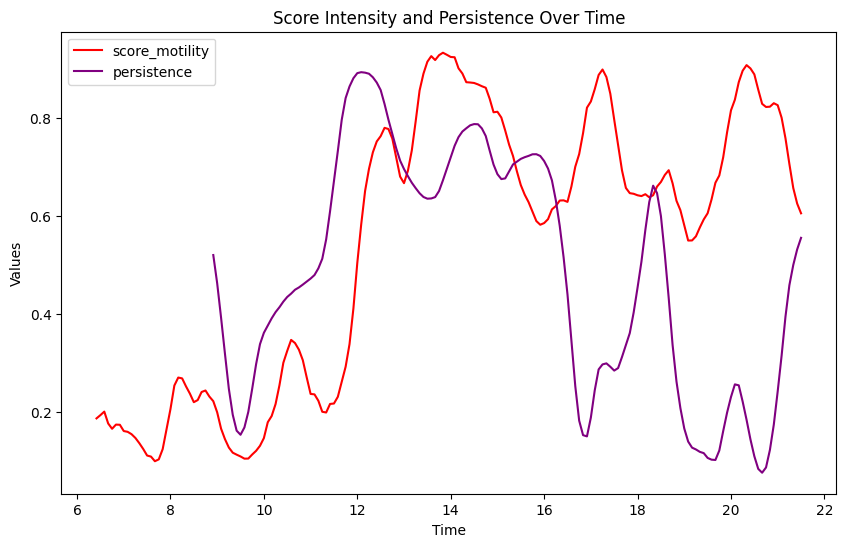

In [25]:
# Extract the data for plotting
score_motility = df_score_persistence['score_SMA_intensity']
persistence = df_score_persistence['persistence_SMA']
time = df_score_persistence['time']

# Create a plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Plot 'score_motility' in red and 'persistence' in purple, with time on the x-axis
plt.plot(time, score_motility, label='score_motility', color='red')
plt.plot(time, persistence, label='persistence', color='purple')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Values')  # You can update the y-axis label accordingly
plt.legend()

# Show the plot
plt.title('Score Intensity and Persistence Over Time')
plt.show()

### Histogram of correlation score ###

col_persistence: change_persistence, col_score: change_score_motility
Pearson Correlation_avg: 0.5115382141696612


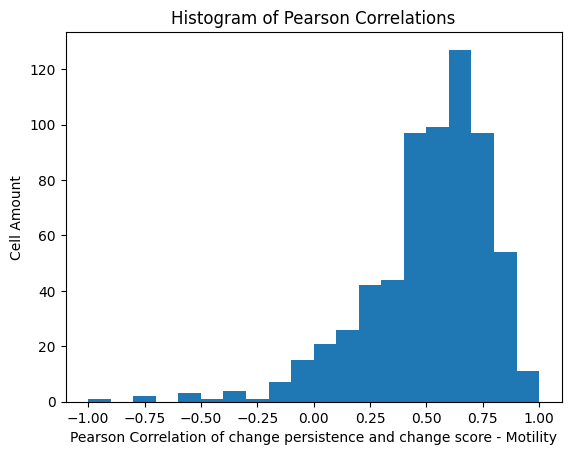

In [7]:
import matplotlib.pyplot as plt

df = new_df

for col_persistence in ['change_persistence']:
    for col_score in ['change_score_motility']:
        list_corr = []
        print(f"col_persistence: {col_persistence}, col_score: {col_score}")
        for idx, grp in df.groupby('Spot track ID'):
            mini_df = grp
            mini_df = mini_df.dropna(subset=[col_persistence, col_score])

            if len(mini_df) >= 2:
                mini_df = mini_df[[col_persistence, col_score]]
                mini_df = mini_df.astype('float64')

                try:
                    correlation = mini_df[col_persistence].corr(mini_df[col_score], method='pearson')
                    list_corr.append(correlation)
                except Exception as e:
                    print(f"Error calculating correlation: {e}, idx: {idx}")

        if list_corr:
            all_corr = np.array(list_corr)
            mean_corr = np.mean(all_corr)

            print("Pearson Correlation_avg:", mean_corr)

            x_range = [-1 + i * 0.1 for i in range(21)]
            plt.hist(list_corr, bins=x_range)
            plt.xlabel('Pearson Correlation of change persistence and change score - Motility')
            plt.ylabel('Cell Amount')
            plt.title('Histogram of Pearson Correlations')
            
            # Remove grid lines
            plt.grid(False)
            plt.savefig('/home/reutme/plots-reut/figure_to_edit/pearson_correlation_change persistence and change score motility.eps', format='eps')

            plt.show()

           
            print('\n\n')

        else:
            print(f"No valid correlations found for col_persistence: {col_persistence}, col_score: {col_score}")
            print('\n\n')

## corr between score and persistence of all cells in critical time - 14.5, 7.5 ##

In [15]:
def preprocess_df_SMA(df):
    change_df = pd.DataFrame()
    for idx, grp in df.groupby('Spot track ID'):
        
        grp['score_SMA_motility'] = grp['score_motility'].rolling(5).mean()
        grp['score_SMA_intensity'] = grp['score_intensity'].rolling(5).mean()
        grp['persistence_SMA'] = grp['persistence'].rolling(5).mean()
        
        # print(grp)
        # break
        # Filter the DataFrame to get the 'persistence_SMA' values for Spot_frame 174 and 90
        persistence_sma_174 = grp[grp['Spot frame'] == 174]['persistence_SMA']
        persistence_sma_90 = grp[grp['Spot frame'] == 90]['persistence_SMA']
        
        # Check if the resulting DataFrames are not empty before extracting values
        if not persistence_sma_174.empty and not persistence_sma_90.empty:
            diff_persistence = persistence_sma_174.values[0] - persistence_sma_90.values[0]
        else:
            diff_persistence = None
        
        # Filter the DataFrame to get the 'score_SMA_intensity' values for Spot_frame 174 and 90
        intensity_sma_174 = grp[grp['Spot frame'] == 174]['score_SMA_intensity']
        intensity_sma_90 = grp[grp['Spot frame'] == 90]['score_SMA_intensity']
        
        # Check if the resulting DataFrames are not empty before extracting values
        if not intensity_sma_174.empty and not intensity_sma_90.empty:
            diff_intensity = intensity_sma_174.values[0] - intensity_sma_90.values[0]
        else:
            diff_intensity = None
        
        # Filter the DataFrame to get the 'score_SMA_motility' values for Spot_frame 174 and 90
        motility_sma_174 = grp[grp['Spot frame'] == 174]['score_SMA_motility']
        motility_sma_90 = grp[grp['Spot frame'] == 90]['score_SMA_motility']
        
        # Check if the resulting DataFrames are not empty before extracting values
        if not motility_sma_174.empty and not motility_sma_90.empty:
            diff_motility = motility_sma_174.values[0] - motility_sma_90.values[0]
        else:
            diff_motility = None
        
        diff_cell = {'Spot track ID': [idx], 'diff_persistence': [diff_persistence], 'diff_motility': [diff_motility], 'diff_intensity': [diff_intensity]}
        df_diff = pd.DataFrame(data=diff_cell)
        
        # Append the modified group data to change_df
        change_df = pd.concat([change_df, df_diff], ignore_index=True)

    return change_df

In [16]:
scores_df_s3 = read_df('properties_scores_df_S3.pkl')
new_df = preprocess_df_SMA(scores_df_s3)


In [17]:
def plot_diff_corr(col1, col2, df):
    # Create x-axis data from 1 to the length of the columns
    x = np.arange(1, len(df) + 1)

    # Plot the columns with smaller point size
    plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
    plt.scatter(df[col1], df[col2], label='Data', s=10)  # Set the 's' parameter to adjust point size
    
    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(df[col1], df[col2])
    
    # Plot the regression line
    plt.plot(df[col1], slope * df[col1] + intercept, color='red', linestyle='--', label=f'Regression Line')

    # Set x and y-axis limits between -1 and 1
    plt.xlim(-0.8, 1)
    plt.ylim(-0.8, 1)

    # Add labels and title
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.title(f'{col1} and {col2}')

    # Add a legend
    plt.legend()

    # Show the plot
    # plt.savefig('/home/reutme/plots-reut/figure_to_edit/pearson correlation critical time persistence and score motility.eps', format='eps')
    plt.show()


     Spot track ID  diff_persistence  diff_motility  diff_intensity
0                1         -0.175632      -0.104887        0.473291
4              217          0.632931       0.116192        0.812898
12             498          0.494242       0.467924        0.020858
15             615         -0.007844       0.336492        0.490414
25            1141         -0.050005      -0.033299        0.126271
..             ...               ...            ...             ...
662          29204         -0.349299       0.266710       -0.055134
666          29375         -0.247451      -0.070476        0.254617
667          29400         -0.060535      -0.101391        0.215356
668          29459         -0.064839      -0.527329       -0.284054
673          29615         -0.146897       0.022175       -0.152505

[81 rows x 4 columns]
diff_persistence, diff_motility,  correlation: 0.5581240645370575


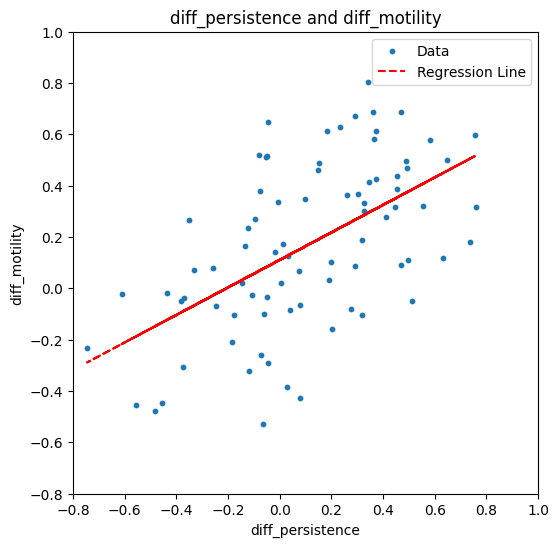

In [18]:
col_persistence = 'diff_persistence'
col_score = 'diff_motility'

motility_df = new_df.dropna(subset=[col_persistence, col_score])
print(motility_df)
correlation = motility_df[col_persistence].corr(motility_df[col_score], method='pearson')
print(f"{col_persistence}, {col_score},  correlation: {correlation}")
plot_diff_corr(col_persistence, col_score, motility_df)
